# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.142649e+01     7.874895e+00
 * time: 0.0017061233520507812
     1     2.961312e+01     5.902757e+00
 * time: 0.006761074066162109
     2     1.966559e+01     4.516043e+00
 * time: 0.013480901718139648
     3     1.478009e+01     4.176163e+00
 * time: 0.02035689353942871
     4     1.462740e+01     6.501004e+00
 * time: 0.025976896286010742
     5     1.161555e+01     2.530320e+00
 * time: 0.03287100791931152
     6     1.049701e+01     4.238389e+00
 * time: 0.0385439395904541
     7     9.428510e+00     2.251629e+00
 * time: 0.044454097747802734
     8     9.009875e+00     2.008553e+00
 * time: 0.050245046615600586
     9     8.673449e+00     1.943228e+00
 * time: 0.05627894401550293
    10     8.460382e+00     1.464893e+00
 * time: 0.06197190284729004
    11     8.328153e+00     9.827963e-01
 * time: 0.06772112846374512
    12     8.205752e+00     7.130341e-01
 * time: 0.07342100143432617
    13     8.148272e+00     6.990178e-01
 *

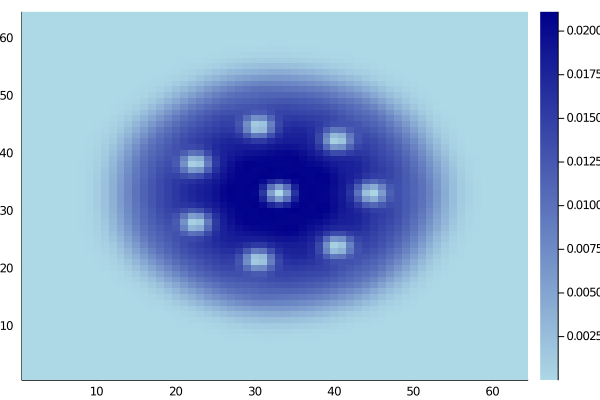

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)